## Lab 3: Plotting Surface Data and Comparing Surface to Upper-Air Data
<br /><br />
In this week's tutorial, we are going to cover how to plot surface observations using matplotlib, cartopy, and MetPy.  Once the tutorial is complete, you will have the maps you need to complete the rest of Lab 3.
<br />
### Module Documentation
1. MetPy Metar Parsing Function: https://unidata.github.io/MetPy/latest/api/generated/metpy.io.parse_metar_file.html
2. Datetime: https://docs.python.org/3/library/datetime.html
3. Matplotlib Pyplot: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.html
4. Caropy crs: https://scitools.org.uk/cartopy/docs/latest/reference/crs.html
5. Cartopy Feature: https://scitools.org.uk/cartopy/docs/latest/matplotlib/feature_interface.html
6. Metpy Station Plot: https://unidata.github.io/MetPy/latest/examples/plots/Station_Plot.html




If you have any questions about the code below, feel free to reach out to me at mpvossen@uwm.edu. I am always willing to further explain the code. <br /> <br />

---

### Part I: Surface Plots
<br />
1. As usual, we start by importing the modules we need for our Python code.

In [44]:
#from python's datetime module (from datetime) import the date and time capabilities (import datetime)
from datetime import datetime
#import the plotting abilities of the module matplotlib (import matplotlib.pyplot) and save it to the variable plt (as plt)
import matplotlib.pyplot as plt
#from metpy's plotting abilities (metpy.plots) import the abilities to create a station plot (StationPlot) and the sky cover symbols (sky_cover).
from metpy.plots import StationPlot, sky_cover, current_weather
#import the cartopy (cartopy) module's coordinate reference system (.crs) and save it to the variable crs
import cartopy.crs as crs
#import the cartopy (cartopy) module's ability to plot geographic data (.feature) and save it to the variable cfeature 
import cartopy.feature as cfeature
#from the metpy's units feature (metpy.units) import the ability to assign and convert units (units)
from metpy.units import units
#from python's data import module (io) import the ability to read a string as a file.  This allows us to avoid downloading files which speeds things up and keeps your files storage clean.
from io import StringIO
#import the module to download files from the internet 
import requests
#from metpy's calculation abilities import the function to reduce the number of observations
from metpy.calc import reduce_point_density
#from metpy's ability to read files, from the metar functions import the parse_metar_file function
from metpy.io.metar import parse_metar_file

#add this line so that the JupyterHub plots the maps within the Jupyter Notebook
%matplotlib inline

<br /><br />
2. Like we have done in previous labs, set the obs_time variable to a datetime specifically for September 14, 2022 at 1200 UTC

In [45]:
obs_time =datetime(2022,9,14,12)

<br /><br />
3. In the code section below, I download the METAR data for the date and time that we have specified - just like we did in Lab 1 Part I.

In [46]:
#the url address to the metar file.
#url = f"https://thredds-test.unidata.ucar.edu/thredds/fileServer/noaaport/text/metar/metar_{obs_time:%Y%m%d_%H}00.txt"

#from the request module, use the get function to retrieve the raw website data from the url we defined above
#web_data = requests.get(url)

#Here we take the web data from before and pull the content (.content) from the web_data object.  
#Then we take the content and decode it to something that we can use rather than the website html (.decode()).
#web_content = web_data.content.decode()

#Here we take the decoded web content from above and make it a file object.  This avoids downloading the data to your file system which
#speeds things up, and it keeps your file space from becoming cluttered.  Instead, this puts the METAR file directly to the RAM of the machine.
#data_file = StringIO(web_content)


#We now tell MetPy to parse out the file we have downloaded (data_file).  MetPy only can get the day of the month from the METAR,
#so we need to specify the month (file_time.month) and year (file_time.year) from the file time that we set before
#or else it will assume the current month and year.  
metar_data = parse_metar_file("/data/AtmSci360/LAB_3/20220914_00.txt", month = obs_time.month, year=obs_time.year)

#Display the resulting METAR pandas-formatted DataFrame
metar_data

,station_id,latitude,longitude,elevation,date_time,wind_direction,wind_speed,wind_gust,visibility,current_wx1,...,air_temperature,dew_point_temperature,altimeter,current_wx1_symbol,current_wx2_symbol,current_wx3_symbol,remarks,air_pressure_at_sea_level,eastward_wind,northward_wind
station_id,,,,,,,,,,,,,,,,,,,,,
CWRU,CWRU,50.12,-127.93,98.0,2022-09-14 00:00:00,350.0,13.0,NaN,NaN,NaN,...,14.0,NaN,NaN,0,0,0,AO1 SLP123 T0136 58007,NaN,2.257426,-12.802501
CWZV,CWZV,51.93,-131.02,92.0,2022-09-14 00:00:00,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0,0,0,AO1 58010,NaN,NaN,NaN
CWPS,CWPS,42.57,-80.03,175.0,2022-09-14 00:00:00,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0,0,0,AO1 53014,NaN,NaN,NaN
FNLU,FNLU,-8.83,13.22,70.0,2022-09-14 00:00:00,NaN,2.0,NaN,9000.00,NaN,...,23.0,20.0,29.91,0,0,0,NOSIG,1013.06,NaN,NaN
FQMA,FQMA,-25.92,32.57,44.0,2022-09-14 00:00:00,150.0,2.0,NaN,9999.00,NaN,...,18.0,15.0,30.36,0,0,0,NOSIG,1028.26,-1.000000,1.732051
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
KFME,KFME,39.08,-76.77,46.0,2022-09-14 00:59:00,0.0,0.0,NaN,16093.44,NaN,...,NaN,NaN,29.90,0,0,0,AO1,NaN,-0.000000,-0.000000
KHHW,KHHW,34.03,-95.55,144.0,2022-09-14 00:59:00,150.0,6.0,NaN,16093.44,NaN,...,24.0,10.0,29.95,0,0,0,AO2,1013.97,-3.000000,5.196152
PTSA,PTSA,5.35,162.94,3.0,2022-09-14 00:59:00,NaN,3.0,NaN,16093.44,NaN,...,30.0,22.0,29.89,0,0,0,,1012.47,NaN,NaN


<br /><br />
4. As with any plot we make, we must first set the projection that we want to use for the map.  In the code block below, setup a Lambert Conformal Conic Projection centered at 40&deg;N and 95&deg;W.  Have the cone of the Lambert Conformal Conic projection intersect at 30&deg;N and 50&deg;N.

In [47]:
proj = crs.LambertConformal(central_longitude=-95, central_latitude=40, standard_parallels=[30,50])

<br /><br />
5. Now that we have specified the projection, let's convert the points from the latitude and longitude coordinate system to a coordinate system that works with the projection we just specified.  When complete, the function will output x/y (or Cartesian) distances from the map's center point to each other point.  These x/y (or Cartesian) positions will be used later.

In [48]:
#projection_variable.transform_points(coordinate system data is in, longitude value, latitude value)
point_locs = proj.transform_points(crs.PlateCarree(), metar_data['longitude'].values,metar_data['latitude'].values)
point_locs

array([[ -2302200.44325654,   1545653.1618939 ,         0.        ],
       [ -2426914.49801813,   1815089.52810683,         0.        ],
       [  1205751.648185  ,    383186.03816862,         0.        ],
       ...,
       [-10469881.92476169,   2784097.74672589,         0.        ],
       [   397862.49330731,    235191.299129  ,         0.        ],
       [-17281118.64469997,   4962146.19240244,         0.        ]])

<br /><br />
6. If we were to plot every station available in the data we downloaded, the data would be so dense that we would never be able read the plot.  So, in the code section below, we are going to reduce the number observations using MetPy's reduce_point_density function.  The reduce_point_density function allows us to specify to keep only those observations that are not within a specified radius of another kept observation.  In the case below, I've specified this radius to be 150 km. <br /><br /> The variable metar_data (created in step 3 above) is a pandas DataFrame.  The function reduce_point_density returns the indices from this DataFrame that we need to keep to reduce the data's density by the just-specified amount.  The point_locs variable that we created in step 5 (with the x and y values) is the first of the inputs for the reduce_point_desnsity function and the second input is the spacing radius in meters.

In [49]:
data = metar_data[reduce_point_density(point_locs, 150000.)]

<br /><br />
7. When using METAR data, the data are in a default set of units, which are not always the units in which we want our data.  We created conversion functions to address this problem in Lab 1, but there are multiple ways to address the unit conversion issue. Today, we are going to see how to do unit conversions in MetPy.  MetPy has the ability to attach units to a single value or to every value in an array.  Attaching units with MetPy can be useful when using MetPy calculation functions (as we will be using throughout the semester) since MetPy calculation functions look at a value's units and start off by automatically converting them to the units that the calculation function needs.  Adding units also allows us to use MetPy's unit conversion functionality, which is useful for when we aren't doing any calculations.  The table below shows the unit codes for a few of the units for which MetPy can work. <br /><br />

| Unit | MetPy Code |
|:----:|:----------:|
| Degrees Fahrenheit | degF |
| Degrees Celsius | degC |
| Kelvin | kelvin |
| Knots | kt |
| Meters Per Second | mps |
| Miles Per Hour | mph |
<br />


In [50]:
#assign units to temperature
temps = data["air_temperature"].values * units.degC

#convert the temperature to the desired units and save it back to the dataframe
data["air_temperature"] = temps.to(units.degF)

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


<br /><br />
8. In the cell, below convert the dew-point temperature (dew_point_temperature), u-wind component (eastward_wind), and the v-wind component (northward_wind) from the standard METAR units to the appropriate imperial units.

In [51]:
dewpoint=data["dew_point_temperature"].values*units.degC
data["dew_point_temperature"]=dewpoint.to(units.degF)

uwind=data["eastward_wind"].values* units.kt
data["eastward_wind"]

vwind=data["northward_wind"].values*units.kt
data["eastward_wind"]



/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


station_id
CWRU    2.257426
CWZV         NaN
CWPS         NaN
FNLU         NaN
FQMA   -1.000000
          ...   
PAAK    6.928203
TJSJ   -4.596267
PASY         NaN
PTSA         NaN
YLEC   -3.993908
Name: eastward_wind, Length: 1335, dtype: float64

<br /><br />
9. All of the data now having been wrangled (often 80+% of an atmospheric scientist's job!), we are ready to plot.  In the section below, I have written out some of the plotting code for you. The rest is left for you to complete.  Pay attention to the comments to know where you need to fill in with your own code.

NameError: name 'level' is not defined

/opt/tljh/user/lib/python3.7/site-packages/cartopy/crs.py:825: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/opt/tljh/user/lib/python3.7/site-packages/cartopy/crs.py:877: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
/opt/tljh/user/lib/python3.7/site-packages/cartopy/crs.py:944: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) > 0:


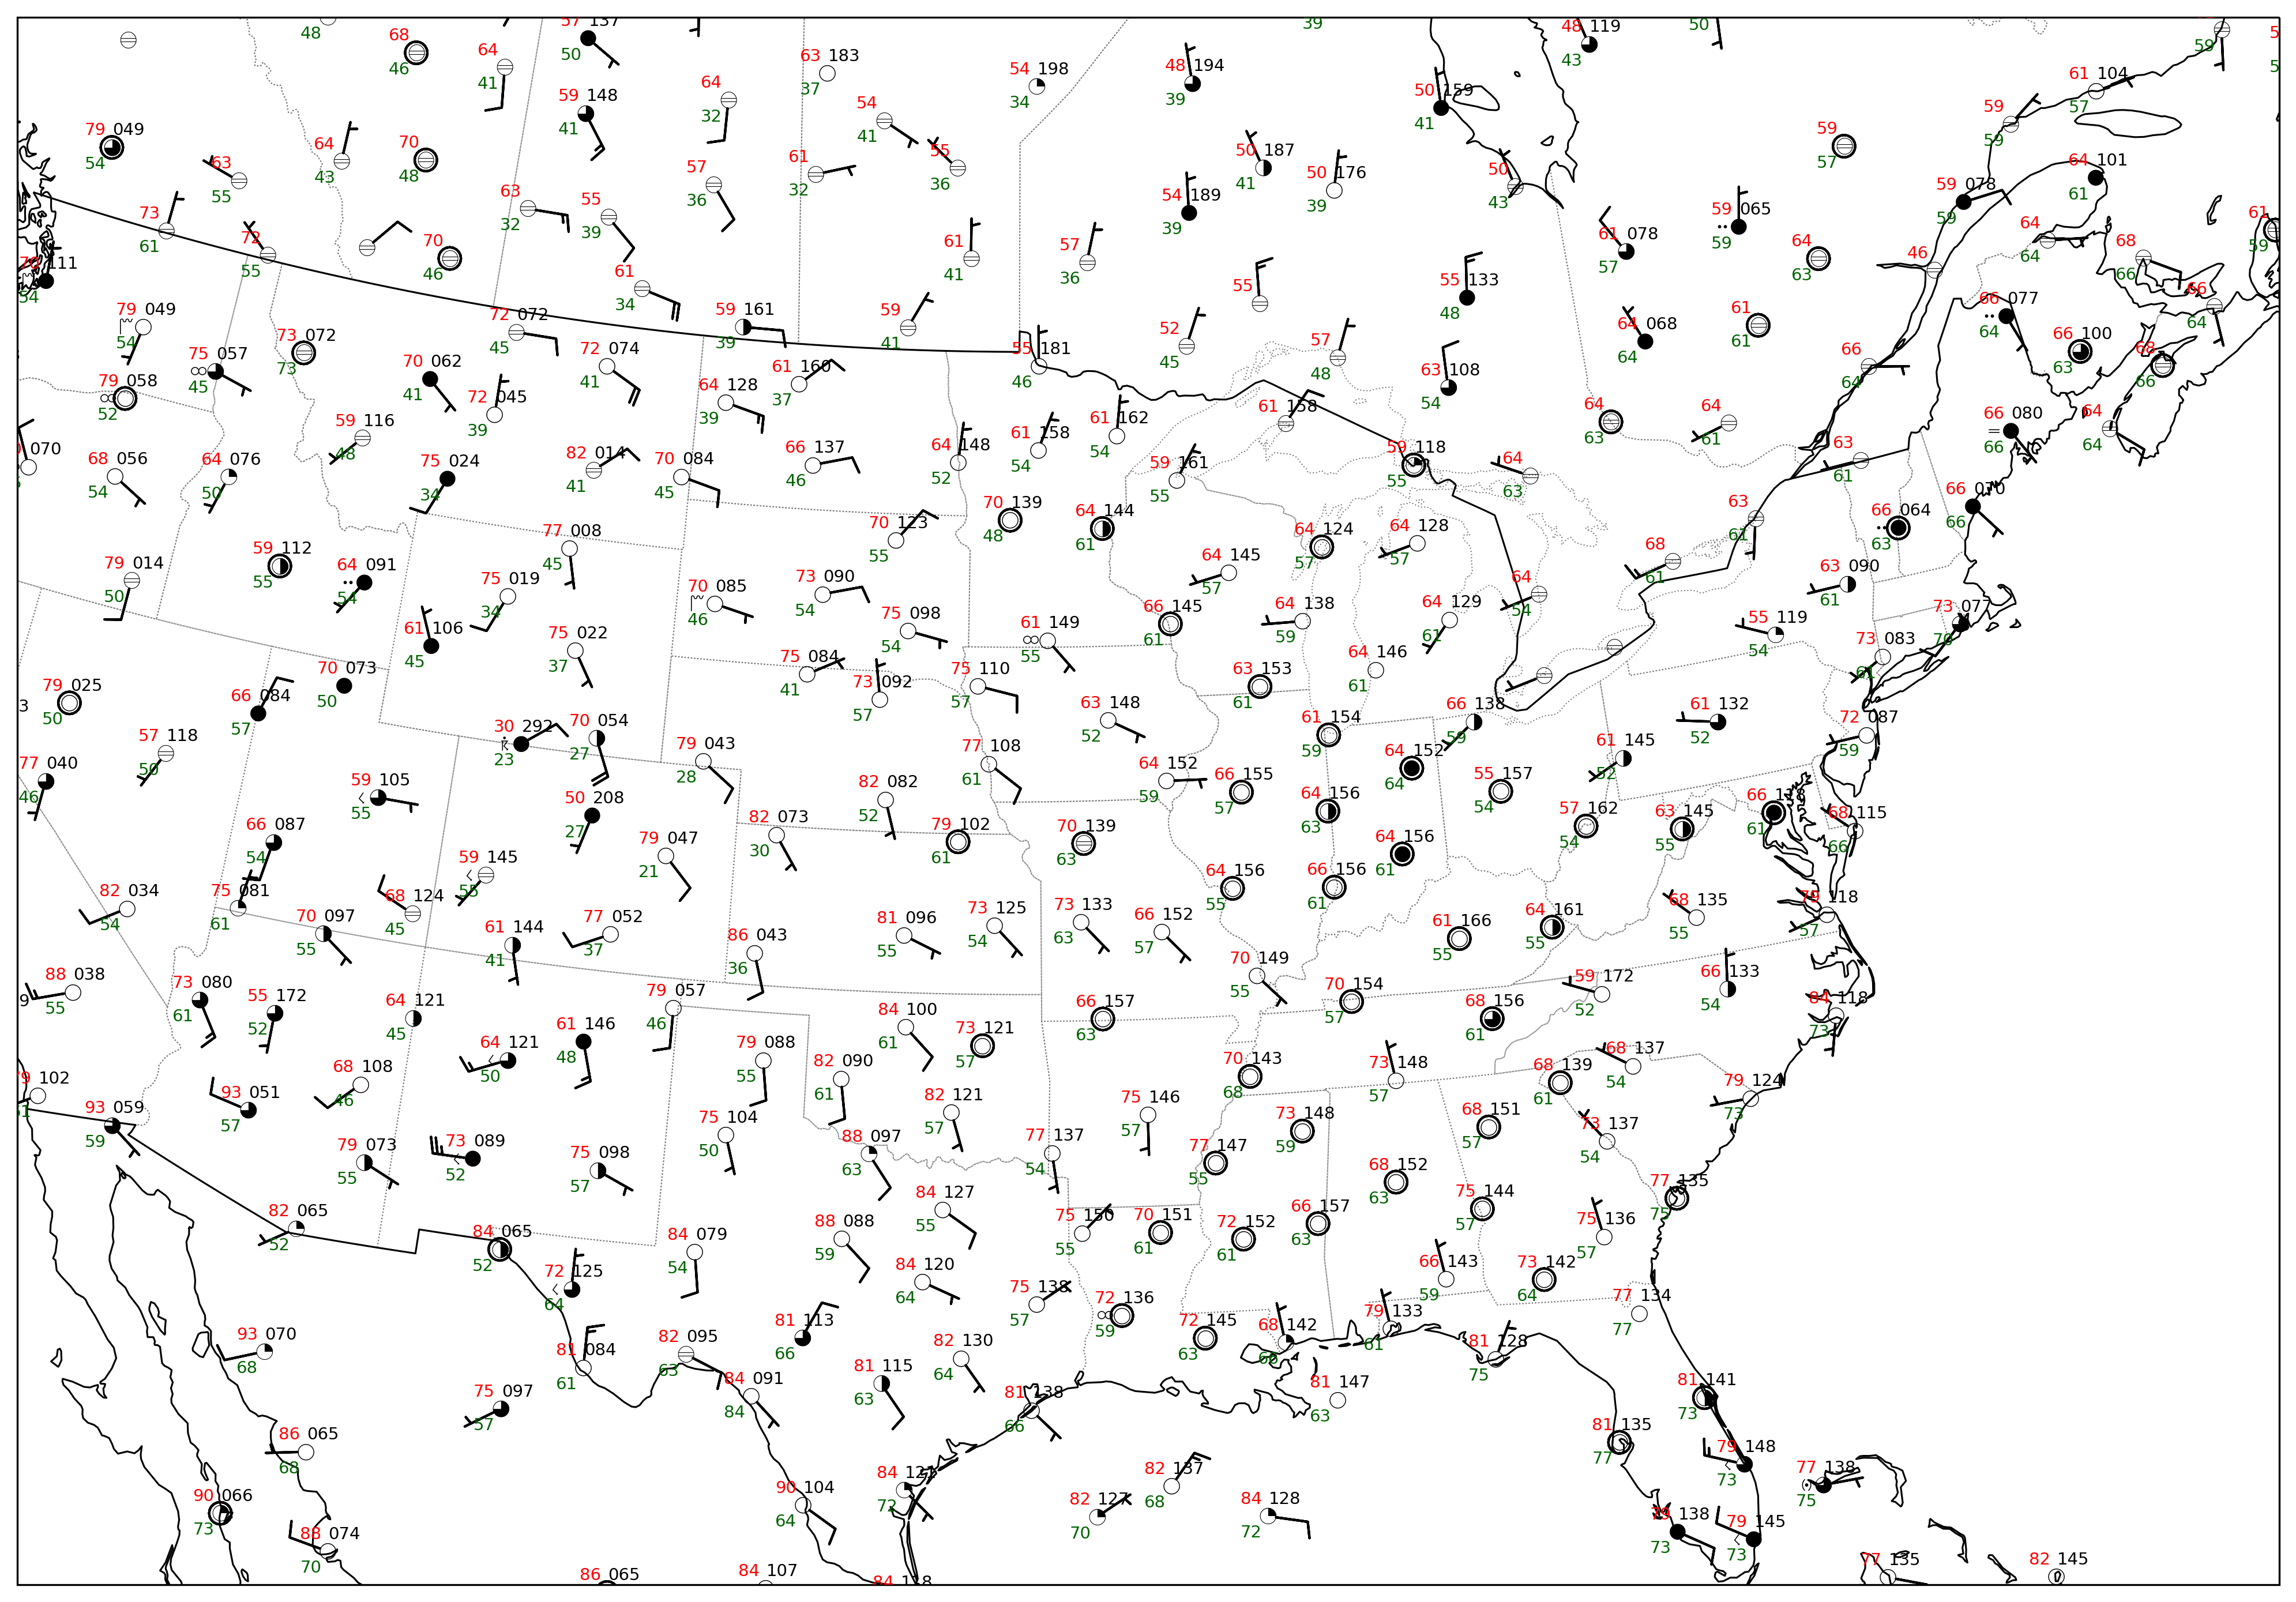

In [52]:
"""
Create a figure with a size of 2000x1200 with a dpi of 300.
"""

fig = plt.figure(figsize=(20,12),dpi=300)

"""
Create the subplot with the projection we defined before.
"""

ax = plt.subplot(projection = proj) 

"""
Add the states, borders, and coastlines to your map.  Be sure to have your borders setup with appropriate line colors and linewidths.
"""
ax.add_feature(cfeature.LAND.with_scale('50m'), edgecolor = "black", facecolor='none',  linewidth=0.75, zorder=2)
ax.add_feature(cfeature.BORDERS.with_scale('50m'), edgecolor = "black",  facecolor='none', linewidth=0.75, zorder=2)
ax.add_feature(cfeature.STATES.with_scale('50m'), edgecolor = "grey", linestyle=":", facecolor='none', linewidth=0.5, zorder=1)

# Set plot bounds (115-70°W, 24-53°N).
ax.set_extent((-115, -70, 24, 53))

"""
Here we setup the station plot.  This line defines the observation locations.

StationPlot(plot variable, longitude of each station, latitude of each station, clip_on=whether to clip off values that fall outside the plot,
transform=the data's coordinate system, fontsize=the size of the data values)
"""
stationplot = StationPlot(ax, data['longitude'].values, data['latitude'].values,
                          clip_on=True, transform=crs.PlateCarree(), fontsize=7)

"""
Plot the temperature and dew-point temperature in the standard station plot locations.  This can be accomplished the same way
we plotted these variables in the upper-air plots in Lab 2.
"""
stationplot.plot_parameter('NW', data['air_temperature'].values, color='red')
stationplot.plot_parameter('SW', data["dew_point_temperature"].values,color='darkgreen')
"""
This line plots the sea-level pressure values.  In surface plots, the sea-level pressure is in the upper right, and so we tell 
MetPy to plot the sea-level pressure to the northeast ('NE') of the center.  We typically only want to plot the last three digits of 
the sea-level pressure value, and so we have to add a formatter to this argument to do so.  The lambda command in the formatter is essentially like a function.
The lambda can take an argument, which in this case is v, and it has an expression, which in this case is the format function.  In the format function, we 
take the variable v and remove the decimal places (.0) while keeping the number as a float (f).  We multiply by 10 so we don't have the decimal place.  
Once the format function is finished, we keep only the last three digits ([-3:]).
"""
stationplot.plot_parameter('NE', data['air_pressure_at_sea_level'].values,
                           formatter=lambda v: format(10 * v, '.0f')[-3:])

"""
This line adds the cloud coverage symbol in the middle of our station plot.  In our ingested data, the cloud coverage comes as a number.  The object sky_cover that we imported
at the start holds what symbol the number represents, and so the plot_symbol matches the number with the symbol and then plots the symbol.

plot_symbol(location, symbol number code, object containing what symbol each number code matches)

"""
stationplot.plot_symbol('C', data['cloud_coverage'].values, sky_cover)

"""
This line plots the current weather symbol to the left of center (W).  Once again, this comes in as a number that we must match to a symbol to plot.  At the start, we 
imported the current_weather object which has the symbols that match the codes, allowing us to again use the plot_symbol function to plot the current weather.

"""
stationplot.plot_symbol('W', data['current_wx1_symbol'].values, current_weather)

"""
Plot the wind barbs for each station plot.  The u-component wind variable name is eastward_wind and the v-component variable name is northward_wind.
"""
stationplot.plot_barb(data['eastward_wind'].values, data['northward_wind'].values)


"""
Create an appropriate title for your map.  Be sure it includes the vertical level and data valid time.
"""
plot_title= f"{str(level)} hPa Observations at {upper_air_time:%m/%d/%Y %H%M} UTC"
    
"""
Here, I take our title and tell maptlotlib to add it to the plot.  I also tell matplotlib to plot the title so that it is in bold text (weight="bold").
"""
plt.title(plot_title, weight="bold")


plt.show()

<br /><br />
### You have now completed the tutorial part of Lab 3.  Be sure upload a fully rendered version of this Jupyter Notebook to your GitHub repository.